# Tanzanian Water Wells Status Prediction

By Melody Bass



![

## Introduction

The focus of this project is to build a classification model to predict the status of water wells in Tanzania.  The model was built from a dataset of the sources of water and status of the waterpoint using an iterative approach and can be found [here](./data/training_set_values.csv).  The dataset contains information on 54,000 waterpoints in Tanzania.  Following is a description of the features that we will include in our model:
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

The first sections focus on investigating, cleaning, wrangling, and engineering some new features.  The next section contains models and evaluation of each, ultimately leading to us to select our best model for predicting waterpoint status.  Finally, I will make recommendations and provide insight on predicting the status of waterpoints making predictions from historical data.

## Business Problem

## Data Understanding

The dataset used for this analysis can be found [here](./data/training_set_values.csv).  It contains a wealth of information about waterpoints in Tanzania and the status of their operation.  The target variable has 3 different options for it's status:
* `functional` - the waterpoint is operational and there are no repairs needed
* `functional needs repair` - the waterpoint is operational, but needs repairs
* `non functional` - the waterpoint is not operational

Below I will import the dataset and start my investigation of relevant information it may contain.  Let's get started! 

In [268]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

In [269]:
# Data Import Train Set
df_train_set = pd.read_csv('data/training_set_values.csv', index_col='id')
df_train_set

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [270]:
# Data import Training set labels
df_train_labels = pd.read_csv('data/training_set_labels.csv', index_col='id')
df_train_labels

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [271]:
#Merge datasets
df = pd.merge(df_train_labels, df_train_set, how = 'inner', on='id')

In [272]:
#Reset index
df.reset_index(inplace=True)
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [273]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [274]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [275]:
sum(df.duplicated())

0

In [276]:
for col in df.columns:
    print(df[col].value_counts())

2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-04-05      1
2011-09-12      1
2013-01-06      1
2011-08-31      1
2011-09-26      1
Name: date_recorded, Length: 356, dtype: int64
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Nyabweta                     1
Sisa  

In [277]:
# Check null values
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [278]:
# Check unique values for categorical data
obj_df = df.select_dtypes(include=['object'])
obj_df.nunique()

status_group                 3
date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

### Initial Observations

#### Missing Values

__scheme_name__ has the most missing values, followed by __funder__, __installer__,  __public_meeting__, __scheme_management__,  and __permit__ with ~3,000 null values, and then __subvillage__ with 371 null values.  Several of these columns will be deleted as they appear to duplicate other columns, and I will investigate __installer__, __permit__, and __subvillage__ further.

#### Data types

* __wpt_name__, __subvillage__, __ward__, __scheme_name__, __installer__, __funder__, and __date_recorded__ are categorical features that have unique values in the thousands.  This will be a problem with dummy variables, will likely remove. 
* I will drop __recorded_by__ as it has the same value for all rows.
* __num_private__ is not defined on the DrivenData site, and it is not obvious what the feature indicates. 
* __id__ column will be dropped.
* __public_meeting__ and __permit__ are boolean.
* __construction_year__ will be feature engineered.
 
#### Duplicate  and Similar Data
 
The following columns all contain duplicate or similar data, will remove features that will cause multicollinearity:
* __extraction_type__, __extraction_type_group__, and __extraction_type_class__
* __payment__ and __payment_type__
* __water_quality__ and __quality_group__ 
* __quanitity__ and __quantity_group__
* __source__ and __source_type__
* __waterpoint_type__ and __waterpoint_type_group__
* __region__ and __region_code__

## Data Cleaning

In this section, I will clean the dataset by removing similar and unnecessary columns and trim the dataset of remaining null values.

### Drop duplicate and columns with similar information

I will keep __extraction_type_class__ and remove __extraction_type__ and __extraction_type_group__ as it's columns values appear to be the most relevant for the project. __scheme_name__ will be dropped for it's many null values.  Other columns will be removed at this point due to irrelavancy, duplicates, null values, and some others will have to be investigated after the first drop.

In [279]:
# Columns to be dropped
dropped_columns = ['extraction_type', 'extraction_type_group', 'payment', 'scheme_name', 'quality_group',
                   'quantity_group', 'source', 'waterpoint_type_group', 'recorded_by', 'num_private', 'id', 'subvillage',
                  'wpt_name', 'ward', 'funder', 'date_recorded', 'public_meeting', 'region_code', 'district_code', 'lga',
                  'scheme_management', 'source_class']

In [280]:
df = df.drop(dropped_columns, axis=1)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   population             59400 non-null  int64  
 9   permit                 56344 non-null  object 
 10  construction_year      59400 non-null  int64  
 11  extraction_type_class  59400 non-null  object 
 12  management             59400 non-null  object 
 13  management_group       59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  wa

### Dealing with null values

In [282]:
#Check for nulls
df.isna().sum()

status_group                0
amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
waterpoint_type             0
dtype: int64

In [283]:
# Drop all remaining null values from our dataset
df = df.dropna()

In [284]:
#Check to see that it worked
df.isna().sum()

status_group             0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
dtype: int64

In [285]:
# Convert boolean permit to integers
df['permit'] = df['permit'].astype(int)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  management_group       55102 non-null  object 
 14  payment_type           55102 non-null  object 
 15  wa

### Investigate management and management_group

I need to investigate these 2 columns further to see if they contain similar information.

In [287]:
df['management'].value_counts()

vwc                 37416
wug                  6314
water board          2705
wua                  2307
private operator     1891
parastatal           1588
water authority       825
other                 733
company               656
unknown               491
other - school         99
trust                  77
Name: management, dtype: int64

In [288]:
df['management_group'].value_counts()

user-group    48742
commercial     3449
parastatal     1588
other           832
unknown         491
Name: management_group, dtype: int64

The most data is contained in the user-group subcategory of __management_group__.  I will groupby to investigate if the information is similar.

In [289]:
df.loc[df['management_group']=='user-group']['management'].value_counts()

vwc            37416
wug             6314
water board     2705
wua             2307
Name: management, dtype: int64

The data is identical to the data contained in the management column in the subcategory of 'user-group'.  I will drop __management_group__ from our features.

In [290]:
#Drop column
df = df.drop('management_group', axis=1)

In [291]:
#Check to see that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  payment_type           55102 non-null  object 
 14  water_quality          55102 non-null  object 
 15  qu

In [292]:
for col in df.columns:
    print(df[col].value_counts())

functional                 29885
non functional             21381
functional needs repair     3836
Name: status_group, dtype: int64
0.0        37811
500.0       3071
50.0        2333
1000.0      1442
20.0        1427
           ...  
38000.0        1
1400.0         1
8500.0         1
6300.0         1
26.0           1
Name: amount_tsh, Length: 95, dtype: int64
 0       18310
-15         54
 303        51
-16         51
-13         50
         ...  
 2424        1
 2405        1
 2628        1
 2552        1
 2576        1
Name: gps_height, Length: 2426, dtype: int64
DWE                         17361
Government                   1788
RWE                          1203
Commu                        1060
DANIDA                       1049
                            ...  
Kambi Migoko                    1
Morovian Church                 1
Mama Agnes Kagimbo              1
Nyabibuye Islamic center        1
Mrish                           1
Name: installer, Length: 2056, dtype: int64
0.000000  

After our first round of cleaning, there are several features we need to examine further:
* __status_group__ is an unbalanced target, may need to look into further during modeling.
* There are several columns with thousands of 0 entries - __amount_tsh__, __gps_height__, __longitude__, __latitude__, __population__, __construction_year__.

### Construction year

In [293]:
df['construction_year'].value_counts()

0       18392
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1996      766
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

In [294]:
# Finding mean and median without zero values
df.loc[df['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000
mean,471.881843,982.395015,36.015003,-6.358975,268.881694,0.717379,1996.888096
std,3074.841656,623.784917,2.609370,2.762486,542.812926,0.450280,12.452883
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,351.000000,34.671850,-8.855908,30.000000,0.000000,1987.000000
50%,0.000000,1116.500000,36.691907,-6.351197,150.000000,1.000000,2000.000000
75%,200.000000,1471.000000,37.896261,-3.731978,304.000000,1.000000,2008.000000
max,250000.000000,2770.000000,40.345193,-1.042375,30500.000000,1.000000,2013.000000


In [295]:
#Replace 0 values in construction_year with mean of data without 0s.
df['construction_year'].replace(to_replace = 0, value = 1996, inplace=True)

In [296]:
#Check to see if it worked
df['construction_year'].value_counts()

1996    19158
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

### Latitude/Longitude zeros

In [297]:
df.longitude.value_counts()

0.000000     1793
32.984790       2
37.540901       2
37.328905       2
37.252194       2
             ... 
39.002868       1
37.095964       1
36.658462       1
33.116994       1
38.592731       1
Name: longitude, Length: 53261, dtype: int64

In [298]:
# Investigate longitude entries that are 0
df.loc[df['longitude'] == 0]

,status_group,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source_type,waterpoint_type
21,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,unknown,unknown,shallow well,hand pump
53,non functional,0.0,0,Government,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,submersible,vwc,unknown,unknown,dry,borehole,communal standpipe multiple
168,functional,0.0,0,WVT,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe
177,non functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,other,wug,unknown,soft,enough,shallow well,other
253,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,other,soft,enough,shallow well,hand pump
59208,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump
59295,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,never pay,soft,enough,shallow well,hand pump
59324,functional,0.0,0,World Vision,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump


The 0s that are entered into the longitude column are also 0s in gps_height and -2e8 for latitude columns.  I will drop these values from the dataset.

In [299]:
# Drop rows with 0 entered in longitude column
df = df.loc[df['longitude'] != 0]

In [300]:
e# Check to see if it worked
df.describe()

NameError: name 'e' is not defined

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53309 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           53309 non-null  object 
 1   amount_tsh             53309 non-null  float64
 2   gps_height             53309 non-null  int64  
 3   installer              53309 non-null  object 
 4   longitude              53309 non-null  float64
 5   latitude               53309 non-null  float64
 6   basin                  53309 non-null  object 
 7   region                 53309 non-null  object 
 8   population             53309 non-null  int64  
 9   permit                 53309 non-null  int64  
 10  construction_year      53309 non-null  int64  
 11  extraction_type_class  53309 non-null  object 
 12  management             53309 non-null  object 
 13  payment_type           53309 non-null  object 
 14  water_quality          53309 non-null  object 
 15  qu

Looks like it all worked!  I believe the __amount_tsh__ 0 values are real so I will leave all data as is for vanilla models.

### Bin bathrooms

Upon researching, I found out that a 0.75 bathroom is a real thing!  It is a bathroom with toilet, sink, and either a bathtub or shower.  To cut down on some of the variable for bathrooms, I will bin into 6 categories.

In [29]:
bins = pd.IntervalIndex.from_tuples([(0.0, 1.0), (1.0, 1.75), (1.75,2.5), (2.5, 3.5), (3.5, 4.5), (4.5,8)])
bath_bins = pd.cut(df['bathrooms'],bins)
bath_bins.categories = ['<1 bath','bath_1_1.75','bath_1.75_2.5','bath_2.5_3.5','bath_3.5_4.5','bath_4.5_8']
bathroom_dummies = pd.get_dummies(bath_bins.cat.rename_categories(bath_bins.categories), drop_first=True)
bathroom_dummies

,bath_1_1.75,bath_1.75_2.5,bath_2.5_3.5,bath_3.5_4.5,bath_4.5_8
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21592,0,1,0,0,0
21593,0,1,0,0,0
21594,0,0,0,0,0
21595,0,1,0,0,0


In [30]:
#Merge dataframe with new bathroom dummies
df = pd.concat([df, bathroom_dummies], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated,bath_1_1.75,bath_1.75_2.5,bath_2.5_3.5,bath_3.5_4.5,bath_4.5_8
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0,0,1,0,0,0


In [31]:
df = df.drop('bathrooms', axis=1)

### Convert categorical strings to integers

In [32]:
# Convert categorical strings to integers
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))
df['view'] = df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
df['condition'] = df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
df['grade'] = df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [33]:
# Check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  int64  
 6   view           21596 non-null  int64  
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_above     21596 non-null  int64  
 10  zipcode        21596 non-null  int64  
 11  has_basement   21596 non-null  int64  
 12  renovated      21596 non-null  int64  
 13  bath_1_1.75    21596 non-null  uint8  
 14  bath_1.75_2.5  21596 non-null  uint8  
 15  bath_2.5_3.5   21596 non-null  uint8  
 16  bath_3.5_4.5   21596 non-null  uint8  
 17  bath_4.5_8     21596 non-null  uint8  
dtypes: flo

In [34]:
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [35]:
df.waterfront.value_counts()

0    21450
1      146
Name: waterfront, dtype: int64

In [36]:
df.view.value_counts()

0    19484
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [37]:
df.condition.value_counts()

2    14020
3     5677
4     1700
1      170
0       29
Name: condition, dtype: int64

## Modified Features Exploration

### Distribution of Data

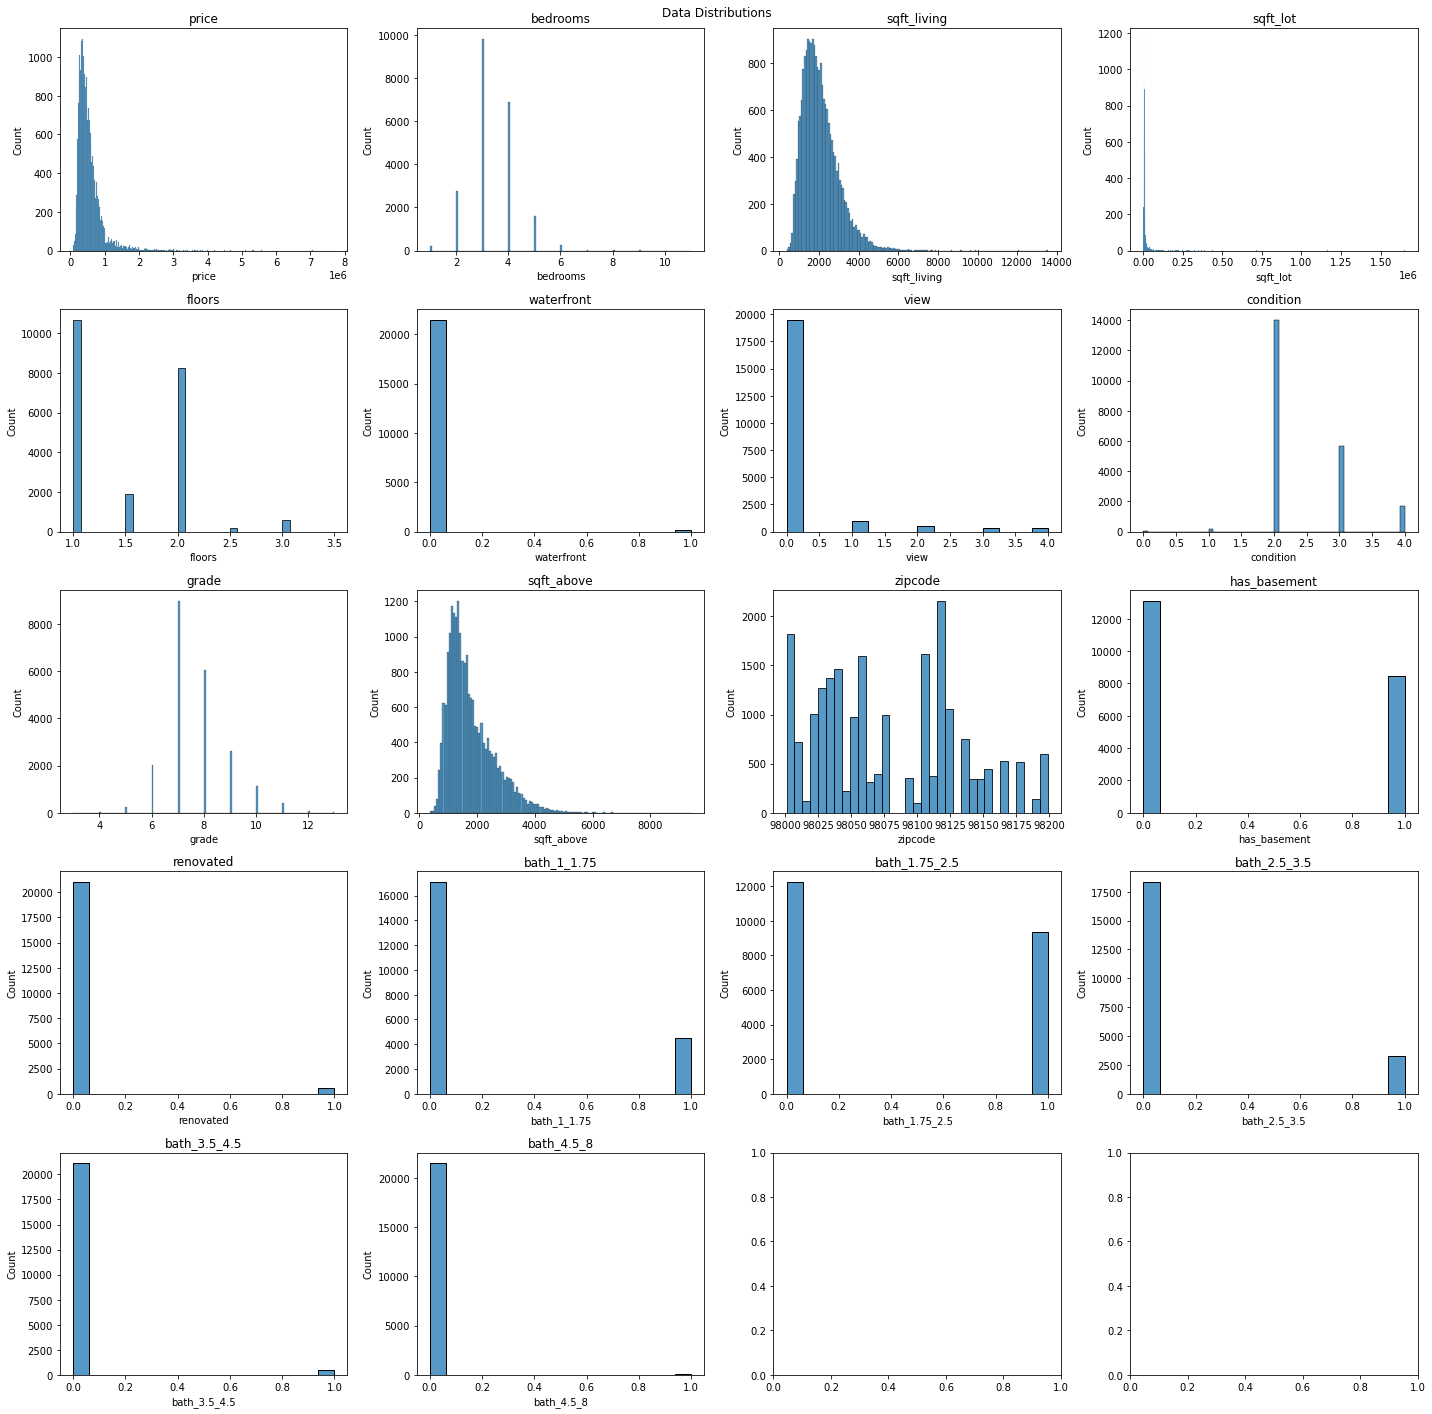

In [38]:
# Distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=5)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

### Categorical column boxplots

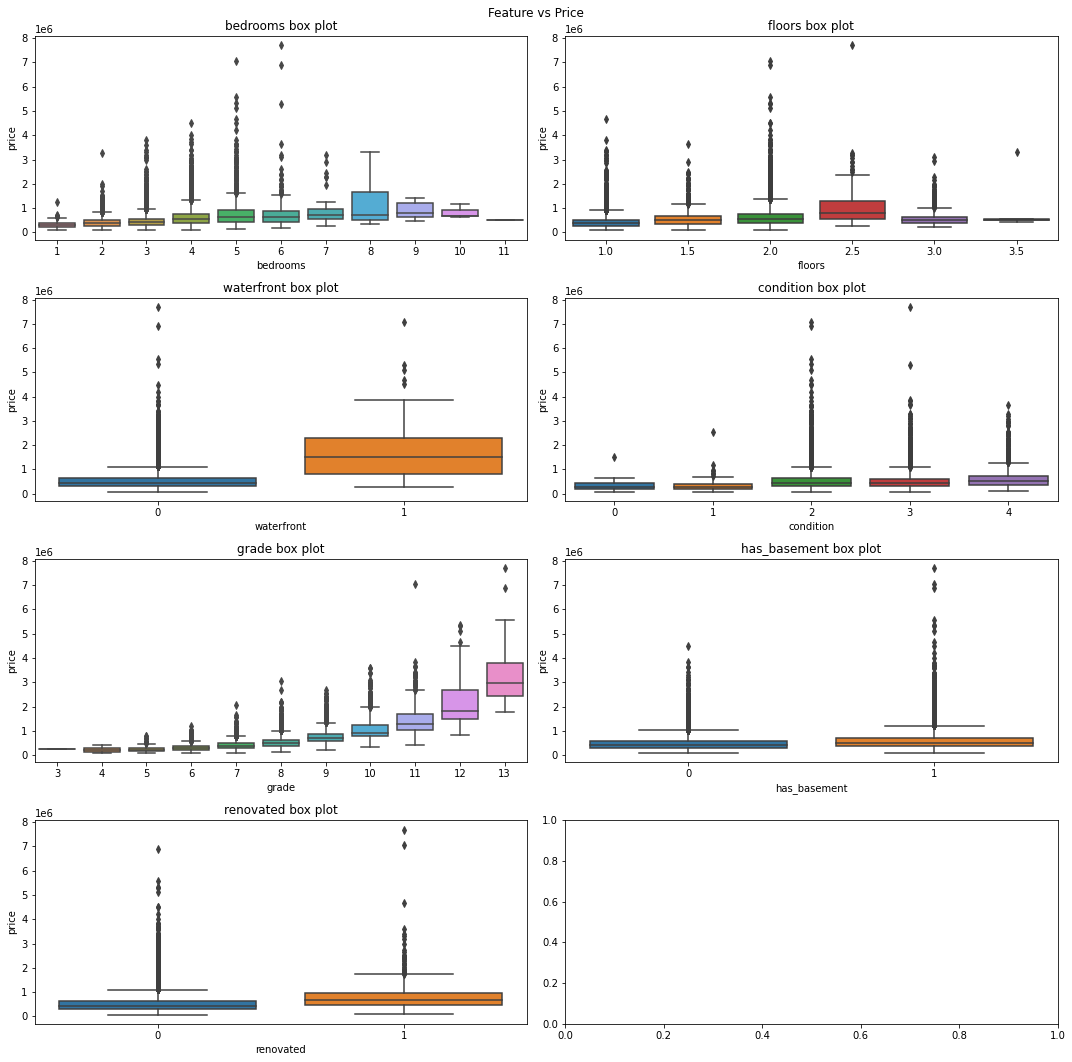

In [39]:
# Boxplots of categorical columns
cat_columns = ['bedrooms','floors','waterfront','condition','grade','has_basement','renovated']
fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=4)
for i in range(len(cat_columns)):
    col = cat_columns[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [40]:
# convert to category type
categorical = ['bedrooms','floors','waterfront','view','condition','grade', 'zipcode', 'renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

### Create Dummy Variables

In [41]:
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,sqft_living,sqft_lot,sqft_above,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1180,5650,1180,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,770,10000,770,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'bath_1_175',
 'bath_175_25',
 'bath_25_35',
 'bath_35_45',
 'bath_45_8',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zi

### Pre-Modeling Linearity Check

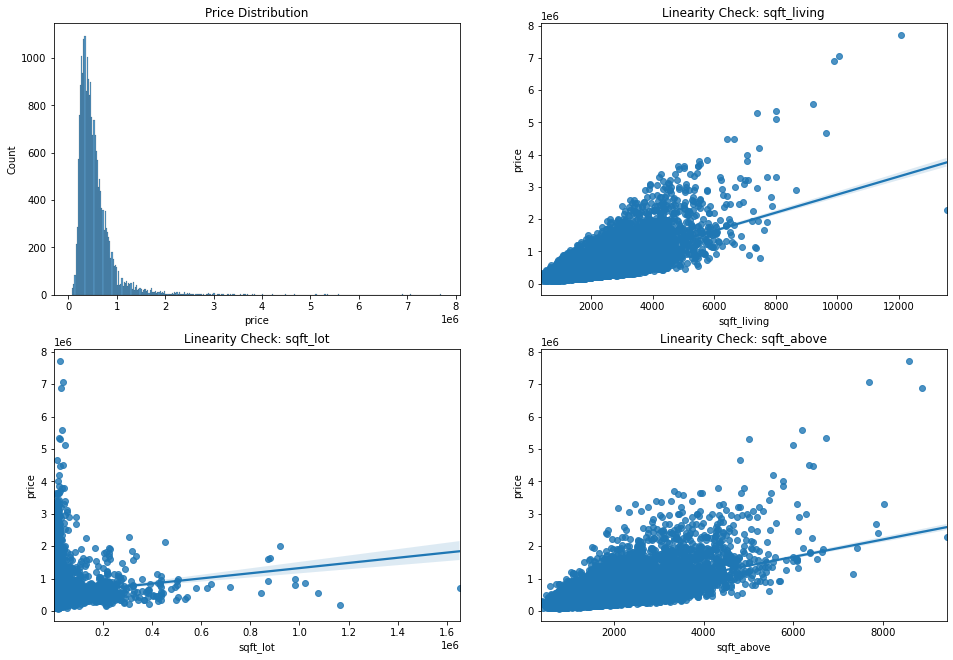

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# Regplot
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

#### Interpretation
* Price has outliers on the high end - possibly remove outliers in an iteration.
* __sqft_living__ and __sqft_above__ have a moderate positive correlation with price.
* __sqft_lot__ has a weak positive correlation with price.
* Try log transformation during modeling to reduce effect of outliers.

### Pre-Modeling Multicollinearity Check

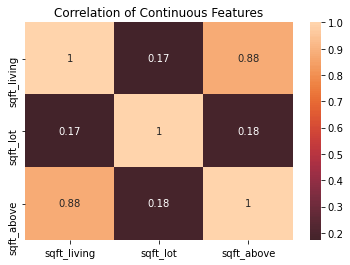

In [44]:
corr = df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

#### Interpretation
Multicollinearity is present between __sqft_living__ and __sqft_above__.  I will drop __sqft_above__ before modeling.

In [45]:
# Drop collinear feature
df = df.drop('sqft_above', axis=1)

## Modeling

### Train Test Split and Model Function

In [46]:
#Name variables
X = df.drop('price', axis=1)
y = df['price']
X.head()

,sqft_living,sqft_lot,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
#Model function
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

### Baseline Model

Following, I will create a model with all features that will serve as our baseline.

In [49]:
model1 = model(X_train,X_test,y_train,y_test);

Train R2:  0.8392611521235334
Test R2:  0.8287892847024411
Train RMSE:  149280.425856272
Test RMSE:  143480.42827559562


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     800.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:05   Log-Likelihood:            -2.3033e+05
No. Observations:               17276   AIC:                         4.609e+05
Df Residuals:                   17163   BIC:                         4.618e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.566e+04   1.54e+05      0.297      0.766   -2.55e+05    3.47e+05
sqft_living      160.5456      2.792     57.499      0.000     155.073     166.019
sqft_lot           0.1531      0.031      5.001      0.000       0.093       0.213
bath_1_175     -1.283e+04   4250.774     -3.019      0.003   -2.12e+04   -4500.466
bath_175_25    -1.011e+04   4572.150     -2.211      0.027   -1.91e+04   -1145.104
bath_25_35       995.3050   5840.388      0.170      0.865   -1.05e+04    1.24e+04
bath_35_45      8.855e+04   1.04e+04      8.541      0.000    6.82e+04    1.09e+05
bath_45_8       3.201e+05   2.09e+04     15.312      0.000    2.79e+05    3.61e+05
bedrooms_2      1.556e+04   1.27e+04      1.229      0.219   -9252.405    4.04e+04
bedrooms_3      2.692e+04   1.27e+04      2.122      0.034    2051.353    5.18e+04
bedrooms_4      1.062e+04    1.3e+04      0.818      0.414   -1.48e+04    3.61e+04
bedrooms_5     -3111.4939   1.37e+04     -0.227      0.820   -2.99e+04    2.37e+04
bedrooms_6     -4.343e+04   1.67e+04     -2.605      0.009   -7.61e+04   -1.08e+04
bedrooms_7     -1.505e+05   3.12e+04     -4.817      0.000   -2.12e+05   -8.93e+04
bedrooms_8     -5.053e+04   4.59e+04     -1.101      0.271    -1.4e+05    3.94e+04
bedrooms_9     -2.606e+05   6.33e+04     -4.117      0.000   -3.85e+05   -1.37e+05
bedrooms_10    -5.078e+05   1.07e+05     -4.725      0.000   -7.18e+05   -2.97e+05
bedrooms_11    -7.278e+04   1.51e+05     -0.483      0.629   -3.68e+05    2.23e+05
floors_15      -4398.6171   4487.959     -0.980      0.327   -1.32e+04    4398.241
floors_20      -1.647e+04   3569.370     -4.615      0.000   -2.35e+04   -9477.188
floors_25        6.39e+04   1.36e+04      4.682      0.000    3.71e+04    9.06e+04
floors_30      -7.483e+04   8112.982     -9.224      0.000   -9.07e+04   -5.89e+04
floors_35       2.617e+04    6.2e+04      0.422      0.673   -9.53e+04    1.48e+05
waterfront_1    6.455e+05   1.73e+04     37.385      0.000    6.12e+05    6.79e+05
view_1           6.99e+04   5819.654     12.011      0.000    5.85e+04    8.13e+04
view_2          1.554e+05   7934.977     19.590      0.000     1.4e+05    1.71e+05
view_3          8.673e+04   9713.653      8.928      0.000    6.77e+04    1.06e+05
view_4          2.589e+05   1.17e+04     22.151      0.000    2.36e+05    2.82e+05
condition_1     6.257e+04    3.3e+04      1.895      0.058   -2144.229    1.27e+05
condition_2     7.264e+04   3.04e+04      2.390      0.017    1.31e+04    1.32e+05
condition_3     1.001e+05   3.04e+04      3.289      0.001    4.04e+04     1.6e+05
condition_4     1.457e+05   3.06e+04      4.757      0.000    8.57e+04    2.06e+05
grade_4        -1.298e+05   1.54e+05     -0.845      0.398   -4.31e+05    1.71e+05
grade_5         -1.83e+05   1.51e+05     -1.212      0.226   -4.79e+05    1.13e+05
grade_6     

Our baseline model has an R2 value of 0.839, which means that 83.9% of the model’s observed variance can be explained by the features, and not just random chance. The train RMSE is 149,280.43, which means that this model predicts within $149,280 of the actual home value. The baseline model also produced a skew of 2.642, indicated the data is not normally distributed. The kurtosis of the baseline model is high at 48.921 indicating a heavy tail and outlier presence. We will look to improve on these numbers. 
There are several features with p_values that are insignificant, but before we drop these features from the data, let's check our residuals.  Our baseline RMSE are as follow:  
__Train RMSE__:  149,280.42
__Test RMSE__:  143,480.43

#### Assumptions Check

In [50]:
# Function for qq_plots
def qq_plot(model):
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')

    fig.suptitle('Normality of Residuals')

    fig.show()
    return qq_plot

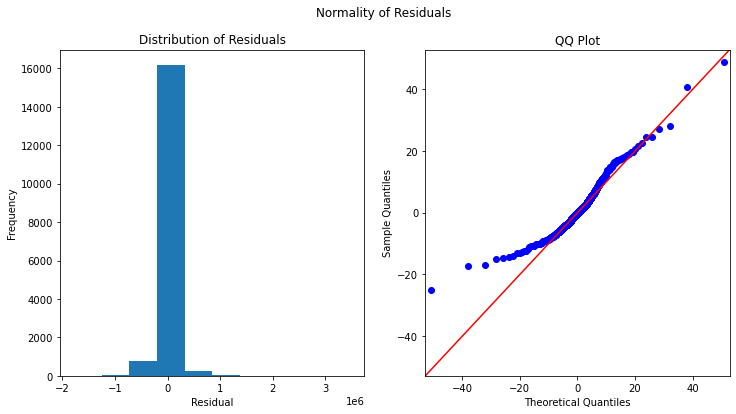

In [51]:
qq_plot(model1);

#Save file
fig.savefig('./images/base_model_qq.png')

Our residuals are not normal, which violates the assumption of normality. I will try to remove outliers in our next iteration.

In [52]:
# Residual plot function
def residual_plot(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=5, xmax=8000000, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([10, 8000000], [10, 5300000], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    
    return residual_plot
    

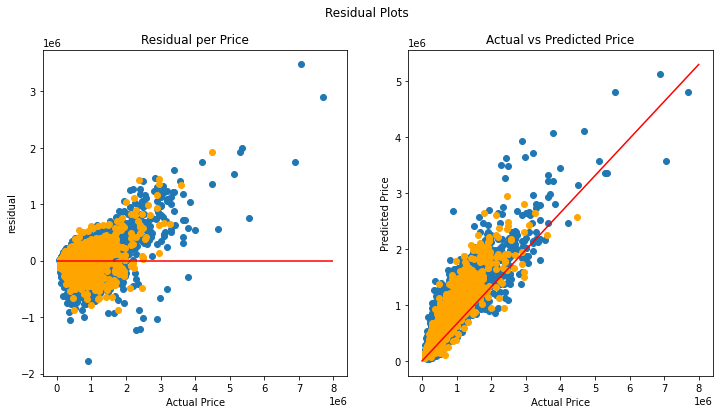

In [53]:
residual_plot(X_train,X_test,y_train,y_test);
#Save file
fig.savefig('./images/base_model_resid.png')

Our results are not homoscedastic.  We have inconsistent model performance mostly underpredicting as the sale price gets higher.

### Model A - Remove Outliers from Price

The interquantile range (IQR)  is the difference between the 75th (q75) and 25th percentiles (q25)  of the data, therefore the middle 50% of the data.  1.5 multiplied by the IQR is a common way to identify and remove outliers that are less than q25 - (1.5 * IQR) and greater than q75 + (1.5 * IQR).  I chose to remove outliers this way  instead of 3 * std because the data was not normally distributed in the variables I was removing outliers from.

In [54]:
# Function to remove outliers
def remove_outliers(df):
    q25 = np.quantile(df,.25)
    q75 = np.quantile(df,.75)
    IQR = q75 - q25
    outliers = df.loc[((q25-1.5*IQR)>df) | (df>(q75+1.5*IQR))].index
    return outliers

In [55]:
def model_outlier(X_train, X_test, y_train, y_test):
   
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=123)
model2 = model_outlier(X_train2,X_test2,y_train2,y_test2);

Train R2:  0.8335062975810769
Test R2:  0.8281258122852568
Train RMSE:  84598.66029571461
Test RMSE:  86545.59797296602


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     731.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:07   Log-Likelihood:            -2.0856e+05
No. Observations:               16339   AIC:                         4.173e+05
Df Residuals:                   16227   BIC:                         4.182e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        9.33e+04   8.71e+04      1.071      0.284   -7.74e+04    2.64e+05
sqft_living      111.2683      1.750     63.570      0.000     107.838     114.699
sqft_lot           0.2879      0.018     15.972      0.000       0.253       0.323
bath_1_175       467.6480   2423.752      0.193      0.847   -4283.173    5218.469
bath_175_25     5126.3910   2626.555      1.952      0.051     -21.947    1.03e+04
bath_25_35      1.923e+04   3409.295      5.642      0.000    1.26e+04    2.59e+04
bath_35_45      2.071e+04   7289.180      2.841      0.005    6421.691     3.5e+04
bath_45_8      -7.218e+04   1.98e+04     -3.654      0.000   -1.11e+05   -3.35e+04
bedrooms_2      1.386e+04   7178.935      1.930      0.054    -213.006    2.79e+04
bedrooms_3      2.446e+04   7201.077      3.397      0.001    1.03e+04    3.86e+04
bedrooms_4      2.348e+04   7383.625      3.180      0.001    9004.416    3.79e+04
bedrooms_5      7494.1664   7854.902      0.954      0.340   -7902.306    2.29e+04
bedrooms_6     -1.055e+04   9833.438     -1.073      0.283   -2.98e+04    8724.260
bedrooms_7     -6.609e+04   1.96e+04     -3.368      0.001   -1.05e+05   -2.76e+04
bedrooms_8     -5.905e+04   3.12e+04     -1.891      0.059    -1.2e+05    2154.399
bedrooms_9     -6.381e+04   4.37e+04     -1.460      0.144   -1.49e+05    2.18e+04
bedrooms_10    -8.175e+04   8.56e+04     -0.955      0.339   -2.49e+05     8.6e+04
bedrooms_11     1.163e+04   8.55e+04      0.136      0.892   -1.56e+05    1.79e+05
floors_15       9987.4324   2610.180      3.826      0.000    4871.192    1.51e+04
floors_20      -9830.2769   2098.820     -4.684      0.000   -1.39e+04   -5716.358
floors_25      -3.178e+04   9170.703     -3.466      0.001   -4.98e+04   -1.38e+04
floors_30      -6.928e+04   4785.660    -14.477      0.000   -7.87e+04   -5.99e+04
floors_35      -7.897e+04   3.82e+04     -2.068      0.039   -1.54e+05   -4124.107
waterfront_1    1.437e+05   1.53e+04      9.378      0.000    1.14e+05    1.74e+05
view_1          6.261e+04   3575.544     17.510      0.000    5.56e+04    6.96e+04
view_2          9.096e+04   5358.572     16.975      0.000    8.05e+04    1.01e+05
view_3          6.434e+04   6075.573     10.591      0.000    5.24e+04    7.63e+04
view_4          1.544e+05   8630.553     17.886      0.000    1.37e+05    1.71e+05
condition_1     4.038e+04   1.91e+04      2.120      0.034    3037.374    7.77e+04
condition_2     6.502e+04   1.76e+04      3.695      0.000    3.05e+04    9.95e+04
condition_3      8.64e+04   1.76e+04      4.905      0.000    5.19e+04    1.21e+05
condition_4     1.166e+05   1.77e+04      6.573      0.000    8.18e+04    1.51e+05
grade_4        -1.382e+05   8.71e+04     -1.586      0.113   -3.09e+05    3.26e+04
grade_5        -1.693e+05   8.56e+04     -1.978      0.048   -3.37e+05   -1501.816
grade_6     

#### Assumptions Check

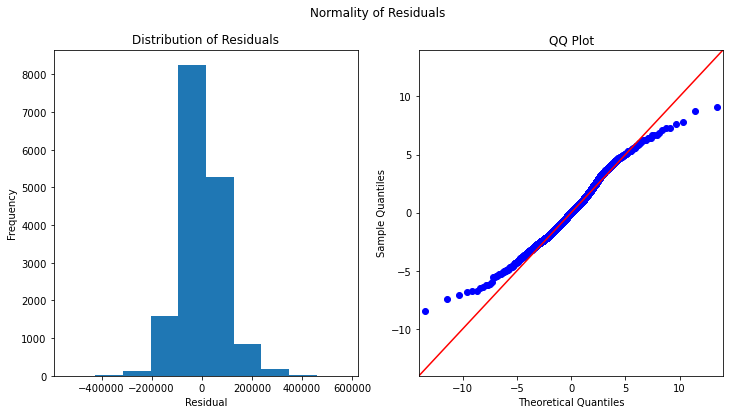

In [57]:
qq_plot(model2);

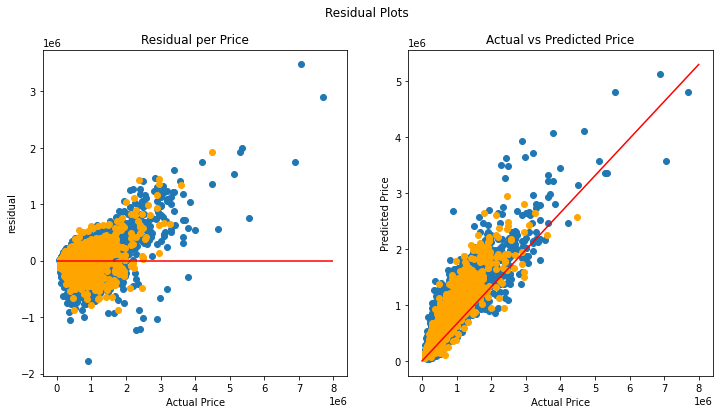

In [58]:
residual_plot(X_train2,X_test2,y_train2,y_test2);

#### Interpretation

* Baseline R2 was 0.839, we have dropped to 0.834 for this iteration.
* Train RMSE: 84,598.66; Test RMSE: 86,545.60.  This is a big improvement from the RMSE of 149,000 in our baseline model.
* Difference between train and test RMSE is acceptable at ~2,000.
* The skew improved to 0.403, and kurtosis to 5.664. 
* Distibution of residuals have improved, but they still fail normality assumptions.
* Fail homoscedasticity check, higher prices are underpredicted.

### Model B - Remove Outliers from Predictors

In [59]:
sqft_lot_outliers = remove_outliers(df['sqft_lot'])

In [60]:
df = df.drop(sqft_lot_outliers)

In [61]:
sqft_living_outliers = remove_outliers(df['sqft_living'])

In [62]:
df = df.drop(sqft_living_outliers)

In [63]:
#Name variables
X_out = df.drop('price', axis=1)
y_out = df['price']
X.head()

,sqft_living,sqft_lot,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_out,y_out,test_size=0.2, random_state=123)
model3 = model_outlier(X_train3,X_test3,y_train3,y_test3);

Train R2:  0.8393027217151785
Test R2:  0.8328208496463197
Train RMSE:  78142.32349698021
Test RMSE:  79202.6317694398


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     680.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:09   Log-Likelihood:            -1.8307e+05
No. Observations:               14432   AIC:                         3.664e+05
Df Residuals:                   14321   BIC:                         3.672e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.476e+04   8.21e+04      0.424      0.672   -1.26e+05    1.96e+05
sqft_living      114.9888      1.893     60.735      0.000     111.278     118.700
sqft_lot           1.8035      0.264      6.840      0.000       1.287       2.320
bath_1_175     -2663.3268   2339.574     -1.138      0.255   -7249.195    1922.541
bath_175_25      647.2931   2560.993      0.253      0.800   -4372.585    5667.171
bath_25_35      1.244e+04   3386.332      3.674      0.000    5803.856    1.91e+04
bath_35_45      3213.8641   8619.445      0.373      0.709   -1.37e+04    2.01e+04
bath_45_8      -1490.3187   3.09e+04     -0.048      0.962    -6.2e+04    5.91e+04
bedrooms_2      1.335e+04   7117.972      1.875      0.061    -603.273    2.73e+04
bedrooms_3      2.148e+04   7147.850      3.006      0.003    7473.814    3.55e+04
bedrooms_4      1.958e+04   7342.446      2.667      0.008    5191.360     3.4e+04
bedrooms_5      4049.3776   7835.457      0.517      0.605   -1.13e+04    1.94e+04
bedrooms_6     -1.936e+04   9934.795     -1.949      0.051   -3.88e+04     109.047
bedrooms_7     -4.257e+04   2.26e+04     -1.882      0.060   -8.69e+04    1758.535
bedrooms_8     -9.166e+04   4.08e+04     -2.248      0.025   -1.72e+05   -1.17e+04
bedrooms_9      3.822e+04   5.64e+04      0.678      0.498   -7.23e+04    1.49e+05
bedrooms_10    -7.824e+04   5.62e+04     -1.392      0.164   -1.88e+05     3.2e+04
bedrooms_11       36.8846   7.91e+04      0.000      1.000   -1.55e+05    1.55e+05
floors_15       1.457e+04   2613.410      5.575      0.000    9445.919    1.97e+04
floors_20      -4996.4698   2209.904     -2.261      0.024   -9328.169    -664.771
floors_25      -1.003e+04   9571.886     -1.048      0.295   -2.88e+04    8732.588
floors_30      -6.056e+04   4785.809    -12.654      0.000   -6.99e+04   -5.12e+04
floors_35      -9.371e+04   3.94e+04     -2.377      0.017   -1.71e+05   -1.64e+04
waterfront_1    1.886e+05   1.92e+04      9.813      0.000    1.51e+05    2.26e+05
view_1           6.69e+04   3705.848     18.053      0.000    5.96e+04    7.42e+04
view_2          8.142e+04   5783.562     14.077      0.000    7.01e+04    9.28e+04
view_3          5.635e+04   5981.466      9.421      0.000    4.46e+04    6.81e+04
view_4          1.723e+05   1.03e+04     16.693      0.000    1.52e+05    1.93e+05
condition_1     6.481e+04   2.32e+04      2.791      0.005    1.93e+04     1.1e+05
condition_2     9.375e+04   2.21e+04      4.250      0.000    5.05e+04    1.37e+05
condition_3     1.139e+05   2.21e+04      5.160      0.000    7.06e+04    1.57e+05
condition_4     1.453e+05   2.22e+04      6.556      0.000    1.02e+05    1.89e+05
grade_4        -1.243e+05   8.17e+04     -1.522      0.128   -2.84e+05    3.58e+04
grade_5        -1.622e+05   7.93e+04     -2.046      0.041   -3.18e+05   -6816.024
grade_6     

#### Assumptions Check

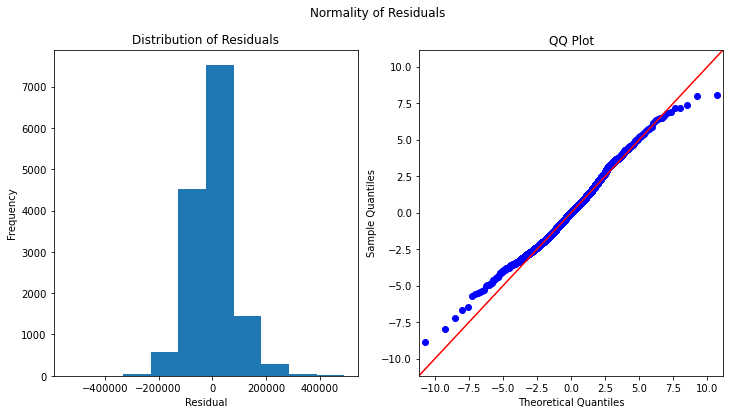

In [65]:
qq_plot(model3);

In [66]:
# Residual plot function
def residual_plot_scale(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=5, xmax=3200000, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([10, 3200000], [10, 2500000], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    
    return residual_plot
    

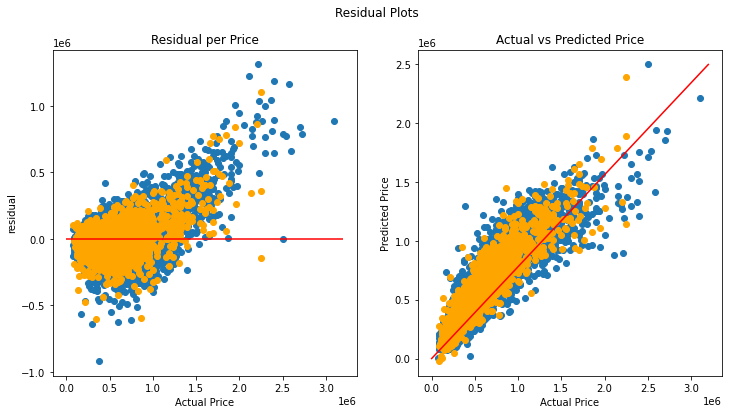

In [67]:
residual_plot_scale(X_train3,X_test3,y_train3,y_test3);

#### Interpretation

* R2 was 0.834, we improved to 0.839 for this iteration.
* Train RMSE: 78,142.32; Test RMSE: 79,202.63.  Another improvement on lowering our RMSE from ~84,000.
* Difference between train and test RMSE is acceptable at ~1,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails.
* Fail homoscedasticity check, higher prices are underpredicted.

### Model C - Remove Insignificant Features

In [68]:
high_p = ['bath_1_175','bath_35_45','bath_45_8','bedrooms_2','bedrooms_5','bedrooms_6','bedrooms_9','bedrooms_10','bedrooms_11',
          'floors_15','floors_20','floors_25','floors_35','condition_1','grade_4','grade_7','grade_8','grade_9','grade_10',
          'grade_11','grade_12','grade_13','zipcode_98002','zipcode_98003','zipcode_98022','zipcode_98023','zipcode_98030',
          'zipcode_98032','zipcode_98092']

In [69]:
#Create new dataframe with significant p-values
sig_X = X_out.drop(high_p, axis=1)

In [70]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(sig_X,y_out,test_size=0.2, random_state=123)
model4 = model_outlier(X_train4,X_test4,y_train4,y_test4);

Train R2:  0.8158585873675179
Test R2:  0.8087657296243353
Train RMSE:  83648.4301959285
Test RMSE:  84709.36329505061


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     765.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:10   Log-Likelihood:            -1.8406e+05
No. Observations:               14432   AIC:                         3.683e+05
Df Residuals:                   14348   BIC:                         3.689e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.644e+04   8648.544     -8.838      0.000   -9.34e+04   -5.95e+04
sqft_living      146.1606      1.534     95.265      0.000     143.153     149.168
sqft_lot           2.0420      0.264      7.723      0.000       1.524       2.560
bath_175_25     5129.9708   1835.633      2.795      0.005    1531.893    8728.049
bath_25_35      2.175e+04   2789.515      7.797      0.000    1.63e+04    2.72e+04
bedrooms_3      1.493e+04   1901.648      7.852      0.000    1.12e+04    1.87e+04
bedrooms_4      1.277e+04   2173.916      5.875      0.000    8509.643     1.7e+04
bedrooms_7     -6.822e+04   2.26e+04     -3.018      0.003   -1.13e+05   -2.39e+04
bedrooms_8     -1.417e+05   4.21e+04     -3.366      0.001   -2.24e+05   -5.92e+04
floors_30      -4.281e+04   4618.871     -9.268      0.000   -5.19e+04   -3.38e+04
waterfront_1    1.749e+05   2.05e+04      8.520      0.000    1.35e+05    2.15e+05
view_1           7.87e+04   3944.824     19.949      0.000     7.1e+04    8.64e+04
view_2          9.562e+04   6159.402     15.524      0.000    8.35e+04    1.08e+05
view_3          6.084e+04   6385.735      9.527      0.000    4.83e+04    7.34e+04
view_4          1.972e+05    1.1e+04     17.926      0.000    1.76e+05    2.19e+05
condition_2      4.46e+04   7707.312      5.787      0.000    2.95e+04    5.97e+04
condition_3      5.67e+04   7758.824      7.308      0.000    4.15e+04    7.19e+04
condition_4     8.591e+04   8037.820     10.688      0.000    7.02e+04    1.02e+05
grade_5        -2.469e+04   7006.607     -3.524      0.000   -3.84e+04    -1.1e+04
grade_6        -1.739e+04   2626.343     -6.622      0.000   -2.25e+04   -1.22e+04
zipcode_98004   5.447e+05   8484.027     64.198      0.000    5.28e+05    5.61e+05
zipcode_98005    3.58e+05   9082.242     39.414      0.000     3.4e+05    3.76e+05
zipcode_98006   3.165e+05   5557.775     56.943      0.000    3.06e+05    3.27e+05
zipcode_98007   2.861e+05   8714.524     32.834      0.000    2.69e+05    3.03e+05
zipcode_98008   2.528e+05   6202.126     40.754      0.000    2.41e+05    2.65e+05
zipcode_98010   9.455e+04    1.5e+04      6.292      0.000    6.51e+04    1.24e+05
zipcode_98011   1.584e+05   7192.484     22.026      0.000    1.44e+05    1.73e+05
zipcode_98014    9.53e+04   1.33e+04      7.153      0.000    6.92e+04    1.21e+05
zipcode_98019   9.849e+04   8378.088     11.756      0.000    8.21e+04    1.15e+05
zipcode_98024    1.36e+05   1.73e+04      7.866      0.000    1.02e+05     1.7e+05
zipcode_98027   2.659e+05   6323.424     42.049      0.000    2.54e+05    2.78e+05
zipcode_98028   1.493e+05   6427.284     23.226      0.000    1.37e+05    1.62e+05
zipcode_98029   2.634e+05   5938.059     44.359      0.000    2.52e+05    2.75e+05
zipcode_98031   1.874e+04   6265.652      2.991      0.003    6457.859     3.1e+04
zipcode_9803

Let's see what our price range is now.

In [71]:
y_train4.max()

3100000.0

In [72]:
y_train4.min()

78000.0

In [73]:
y_test4.max()

2250000.0

In [74]:
y_test4.min()

81000.0

Model includes houses from 78,000 to 3.1 million dollars.

#### Assumptions Check

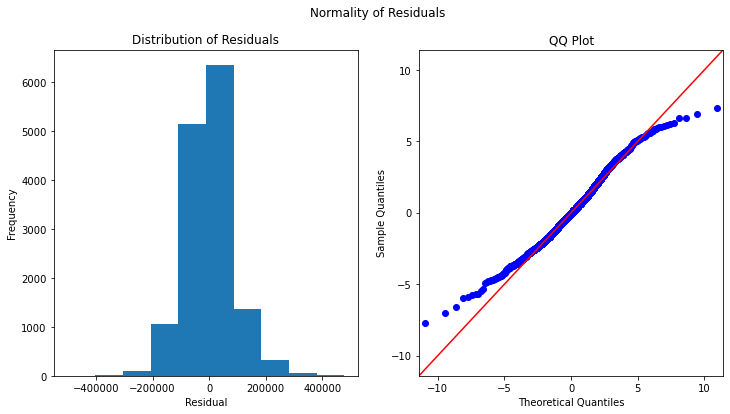

In [75]:
qq_plot(model4);

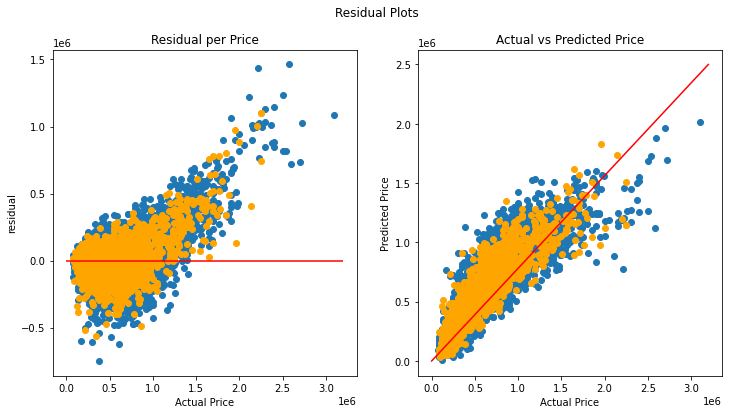

In [76]:
residual_plot_scale(X_train4,X_test4,y_train4,y_test4);

#### Interpretation

* R2 was 0.839, we are lower for this iteration at 0.816.
* Train RMSE: 83,648.43; Test RMSE: 84,709.36. Higher RMSE from ~78,000.
* Difference between train and test RMSE is acceptable at ~1,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails.
* Fail homoscedasticity check, higher prices are still underpredicted.

### Model D -  Log Transformation

For this iteration, I will log transform price.


In [77]:
log_y = np.log(y_out)

In [78]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model


In [79]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
model5 = model_log(X_train5,X_test5,y_train5,y_test5);

Train R2:  0.8517699542031145
Test R2:  0.851563191738585
Train RMSE:  108603.30404231948
Test RMSE:  110030.43959523915


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1032.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:11   Log-Likelihood:                 4030.4
No. Observations:               14989   AIC:                            -7893.
Df Residuals:                   14905   BIC:                            -7253.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.6535      0.019    615.562      0.000      11.616      11.691
sqft_living        0.0003    3.2e-06     99.189      0.000       0.000       0.000
sqft_lot        5.232e-06   5.71e-07      9.159      0.000    4.11e-06    6.35e-06
bath_175_25        0.0345      0.004      8.693      0.000       0.027       0.042
bath_25_35         0.0466      0.006      7.891      0.000       0.035       0.058
bedrooms_3         0.0330      0.004      7.995      0.000       0.025       0.041
bedrooms_4         0.0304      0.005      6.533      0.000       0.021       0.040
bedrooms_7        -0.1998      0.048     -4.142      0.000      -0.294      -0.105
bedrooms_8        -0.3143      0.093     -3.380      0.001      -0.497      -0.132
floors_30         -0.0779      0.010     -7.908      0.000      -0.097      -0.059
waterfront_1       0.4981      0.031     16.275      0.000       0.438       0.558
view_1             0.1551      0.008     18.832      0.000       0.139       0.171
view_2             0.2347      0.012     19.859      0.000       0.212       0.258
view_3             0.1185      0.013      9.032      0.000       0.093       0.144
view_4             0.3756      0.018     20.528      0.000       0.340       0.411
condition_2        0.1511      0.017      8.910      0.000       0.118       0.184
condition_3        0.1793      0.017     10.502      0.000       0.146       0.213
condition_4        0.2311      0.018     13.098      0.000       0.197       0.266
grade_5           -0.2236      0.015    -14.465      0.000      -0.254      -0.193
grade_6           -0.0974      0.006    -16.856      0.000      -0.109      -0.086
zipcode_98004      1.1806      0.015     79.286      0.000       1.151       1.210
zipcode_98005      0.8029      0.020     40.807      0.000       0.764       0.842
zipcode_98006      0.7107      0.012     60.016      0.000       0.687       0.734
zipcode_98007      0.7054      0.019     36.972      0.000       0.668       0.743
zipcode_98008      0.6605      0.014     48.677      0.000       0.634       0.687
zipcode_98010      0.2525      0.033      7.602      0.000       0.187       0.318
zipcode_98011      0.4624      0.016     29.096      0.000       0.431       0.494
zipcode_98014      0.2423      0.029      8.230      0.000       0.185       0.300
zipcode_98019      0.3253      0.019     17.572      0.000       0.289       0.362
zipcode_98024      0.3966      0.038     10.376      0.000       0.322       0.472
zipcode_98027      0.6558      0.014     47.142      0.000       0.628       0.683
zipcode_98028      0.4366      0.014     30.735      0.000       0.409       0.464
zipcode_98029      0.6606      0.013     50.626      0.000       0.635       0.686
zipcode_98031      0.0766      0.014      5.528      0.000       0.049       0.104
zipcode_9803

#### Assumptions Check

In [80]:
# Update qq_plot function to save fig
def qq_plot(model):
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')

    fig.suptitle('Normality of Residuals')

    fig.show()
    #save fig
    fig.savefig('./images/final_qq_plot.png')

    return qq_plot

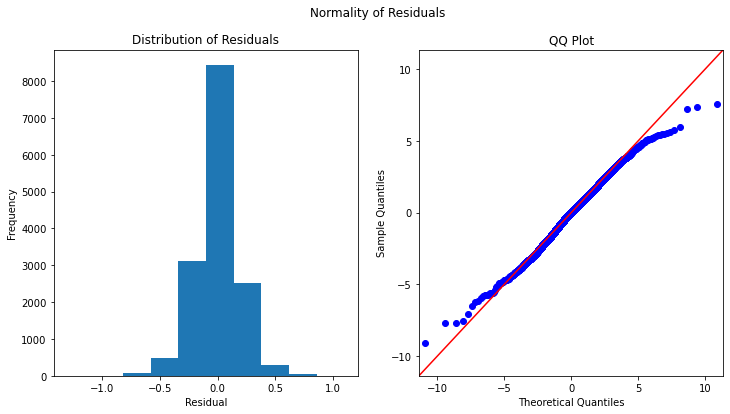

In [81]:
qq_plot(model5);

In [82]:
# Residual plot function
def residual_plot_log(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=11, xmax=15, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([11.5, 15], [11.5, 15], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    #save fig
    fig.savefig('./images/final_resid_plot.png')
    return residual_plot_log
    

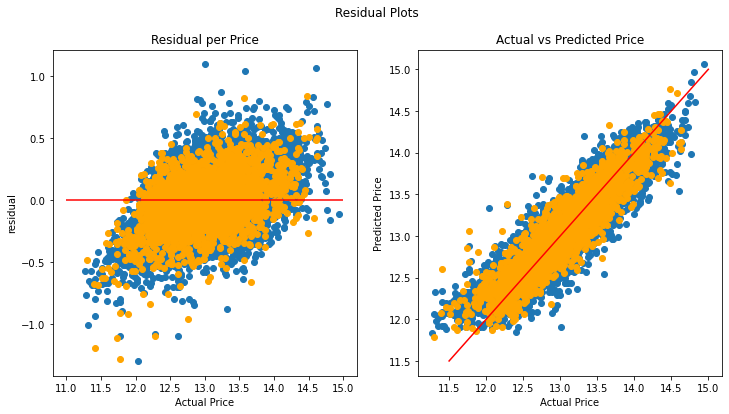

In [83]:
residual_plot_log(X_train5,X_test5,y_train5,y_test5);

In [84]:
((np.e**(model5.params.sort_values(ascending=False))-1)*100).head(50)

Intercept        1.150922e+07
zipcode_98039    2.811981e+02
zipcode_98004    2.256487e+02
zipcode_98112    2.031788e+02
zipcode_98109    1.917444e+02
zipcode_98119    1.871936e+02
zipcode_98102    1.864515e+02
zipcode_98105    1.712228e+02
zipcode_98040    1.610332e+02
zipcode_98199    1.524730e+02
zipcode_98107    1.424884e+02
zipcode_98122    1.376005e+02
zipcode_98103    1.371181e+02
zipcode_98117    1.334841e+02
zipcode_98115    1.317239e+02
zipcode_98005    1.232080e+02
zipcode_98033    1.229324e+02
zipcode_98116    1.166859e+02
zipcode_98006    1.035375e+02
zipcode_98136    1.032746e+02
zipcode_98007    1.024737e+02
zipcode_98052    9.937973e+01
zipcode_98144    9.863421e+01
zipcode_98053    9.424812e+01
zipcode_98029    9.359418e+01
zipcode_98008    9.357666e+01
zipcode_98027    9.266155e+01
zipcode_98075    8.825889e+01
zipcode_98074    8.639567e+01
zipcode_98177    8.510381e+01
zipcode_98125    7.779627e+01
zipcode_98126    7.575651e+01
zipcode_98034    6.998969e+01
zipcode_98

In [85]:
((np.e**(model5.params.sort_values(ascending=False))-1)*100).tail(10)

bedrooms_3         3.351871
bedrooms_4         3.091305
sqft_living        0.031738
sqft_lot           0.000523
has_basement_1    -6.110547
floors_30         -7.496362
grade_6           -9.279271
bedrooms_7       -18.111724
grade_5          -20.033868
bedrooms_8       -26.972117
dtype: float64

In [86]:
# Waterfront Coefficient
(np.exp(.4981)-1)*100

64.55916743438233

In [87]:
# sqft_living coefficient
(np.exp(0.0003)-1)*100

0.030004500450031557

In [88]:
# basement coefficient
(np.exp(-0.0631)-1)*100

-6.115041596367476

In [89]:
#view_4 coefficient
(np.exp(0.3756)-1)*100

45.58646714178145

In [90]:
# Renovated in the last 30 years coefficient
(np.exp(0.0807)-1)*100

8.404563408960142

In [91]:
# 3 floors coefficient
(np.exp(-0.0779)-1)*100

-7.494307238883002

#### Interpretation

* R2 was 0.816, we have improved in this model to 0.852.
* Train RMSE: 108,603.30; Test RMSE: 110,030.43. Higher RMSE from ~84,000.
* Difference between train and test RMSE is acceptable at ~2,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails indicating that errors are likely for extreme values.
* Homoscedasticity has greatly improved! Homes on the lower end now are more overpredicted, but due to the fact that we want a wide range of prices in our model it is acceptable.
* Even though our RMSE has increased, this is our best performing model because it passes the assumptions of regression.


### Scale the Final Model

To determine which features have the most impact on sale price, I will update my model fuction to scale the data using Standard Scaler.  This will allow us to compare the effects of each feature on a level playing field.

In [92]:
# Model function to reverse log transform for metrics
def model_scale_log(X_train, X_test, y_train, y_test):
    
    standardizer = StandardScaler()

    X_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)
    
    X_train_scaled['price'] = y_train.values
    X_test_scaled['price'] = y_test.values
    
    # statsmodels
    outcome = 'price'
    predictors = X_train_scaled.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=X_train_scaled).fit()
    
    # sklearn
    X_train_scaled = X_train_scaled.drop('price', axis=1)
    X_test_scaled = X_test_scaled.drop('price', axis=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    y_hat_train_log = linreg.predict(X_train_scaled)
    y_hat_test_log = linreg.predict(X_test_scaled)
    
    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train_scaled, y_train))
    print("Test R2: ", linreg.score(X_test_scaled, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [93]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
model6 = model_scale_log(X_train6,X_test6,y_train6,y_test6);

Train R2:  0.8517699542031145
Test R2:  0.8515631917385926
Train RMSE:  108603.30404232668
Test RMSE:  110030.4395952352


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1032.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:26:12   Log-Likelihood:                 4030.4
No. Observations:               14989   AIC:                            -7893.
Df Residuals:                   14905   BIC:                            -7253.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.9911      0.002   8576.825      0.000      12.988      12.994
sqft_living        0.2286      0.002     99.189      0.000       0.224       0.233
sqft_lot           0.0186      0.002      9.159      0.000       0.015       0.023
bath_175_25        0.0171      0.002      8.693      0.000       0.013       0.021
bath_25_35         0.0158      0.002      7.891      0.000       0.012       0.020
bedrooms_3         0.0165      0.002      7.995      0.000       0.012       0.020
bedrooms_4         0.0140      0.002      6.533      0.000       0.010       0.018
bedrooms_7        -0.0063      0.002     -4.142      0.000      -0.009      -0.003
bedrooms_8        -0.0051      0.002     -3.380      0.001      -0.008      -0.002
floors_30         -0.0133      0.002     -7.908      0.000      -0.017      -0.010
waterfront_1       0.0293      0.002     16.275      0.000       0.026       0.033
view_1             0.0295      0.002     18.832      0.000       0.026       0.033
view_2             0.0310      0.002     19.859      0.000       0.028       0.034
view_3             0.0140      0.002      9.032      0.000       0.011       0.017
view_4             0.0373      0.002     20.528      0.000       0.034       0.041
condition_2        0.0721      0.008      8.910      0.000       0.056       0.088
condition_3        0.0788      0.007     10.502      0.000       0.064       0.093
condition_4        0.0630      0.005     13.098      0.000       0.054       0.072
grade_5           -0.0229      0.002    -14.465      0.000      -0.026      -0.020
grade_6           -0.0294      0.002    -16.856      0.000      -0.033      -0.026
zipcode_98004      0.1268      0.002     79.286      0.000       0.124       0.130
zipcode_98005      0.0637      0.002     40.807      0.000       0.061       0.067
zipcode_98006      0.0995      0.002     60.016      0.000       0.096       0.103
zipcode_98007      0.0577      0.002     36.972      0.000       0.055       0.061
zipcode_98008      0.0784      0.002     48.677      0.000       0.075       0.082
zipcode_98010      0.0117      0.002      7.602      0.000       0.009       0.015
zipcode_98011      0.0460      0.002     29.096      0.000       0.043       0.049
zipcode_98014      0.0127      0.002      8.230      0.000       0.010       0.016
zipcode_98019      0.0275      0.002     17.572      0.000       0.024       0.031
zipcode_98024      0.0159      0.002     10.376      0.000       0.013       0.019
zipcode_98027      0.0760      0.002     47.142      0.000       0.073       0.079
zipcode_98028      0.0491      0.002     30.735      0.000       0.046       0.052
zipcode_98029      0.0829      0.002     50.626      0.000       0.080       0.086
zipcode_98031      0.0088      0.002      5.528      0.000       0.006       0.012
zipcode_9803

Features with the most impact on sale price ranked.  The features with the most positive impact on sale price are __sqft_living__ and __zipcode__.

In [94]:
model6.params.sort_values(ascending=False).head(50)

Intercept        12.991108
sqft_living       0.228635
zipcode_98103     0.151857
zipcode_98115     0.144025
zipcode_98117     0.143762
zipcode_98112     0.127577
zipcode_98004     0.126825
zipcode_98199     0.117198
zipcode_98052     0.112953
zipcode_98033     0.112095
zipcode_98122     0.109072
zipcode_98105     0.108682
zipcode_98119     0.103260
zipcode_98107     0.103126
zipcode_98040     0.101895
zipcode_98116     0.099612
zipcode_98006     0.099531
zipcode_98144     0.091277
zipcode_98034     0.086746
zipcode_98074     0.085337
zipcode_98125     0.082926
zipcode_98029     0.082918
zipcode_98109     0.082260
zipcode_98136     0.080587
condition_3       0.078758
zipcode_98008     0.078356
zipcode_98126     0.076753
zipcode_98027     0.075980
zipcode_98118     0.075680
zipcode_98133     0.075043
zipcode_98053     0.074086
zipcode_98102     0.073762
condition_2       0.072096
zipcode_98075     0.071689
zipcode_98177     0.065956
zipcode_98005     0.063720
condition_4       0.062951
z

Features with the most negative impace on sale price include if the house has a basement, grade of 5 or 6, and 3 floors.

In [95]:
model6.params.sort_values(ascending=False).tail(20)


bath_25_35        0.015842
bedrooms_4        0.014021
view_3            0.013960
zipcode_98178     0.013793
renovated_1       0.012810
zipcode_98014     0.012657
zipcode_98010     0.011655
zipcode_98031     0.008848
zipcode_98070     0.007876
zipcode_98168     0.007875
zipcode_98148     0.007650
zipcode_98042     0.007553
zipcode_98198     0.005635
zipcode_98188     0.005408
bedrooms_8       -0.005134
bedrooms_7       -0.006318
floors_30        -0.013340
grade_5          -0.022904
grade_6          -0.029363
has_basement_1   -0.030770
dtype: float64

### Visualizing Zip Code Locations

In [96]:
def top_zips(zipcode):
    top_zips = [98039,98004,98109,98119,98112,98102,98105,98040,98199,98107]
    low_zips = [98148,98188,98168,98178,98001,98014,98010,98031,98070,98042]
    if zipcode in top_zips:
        return 2
    if zipcode in low_zips:
        return 0
    else:
        return 1

In [97]:
zips_df['top_zipcode'] = zips_df['zipcode'].apply(top_zips)
zips_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,top_zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


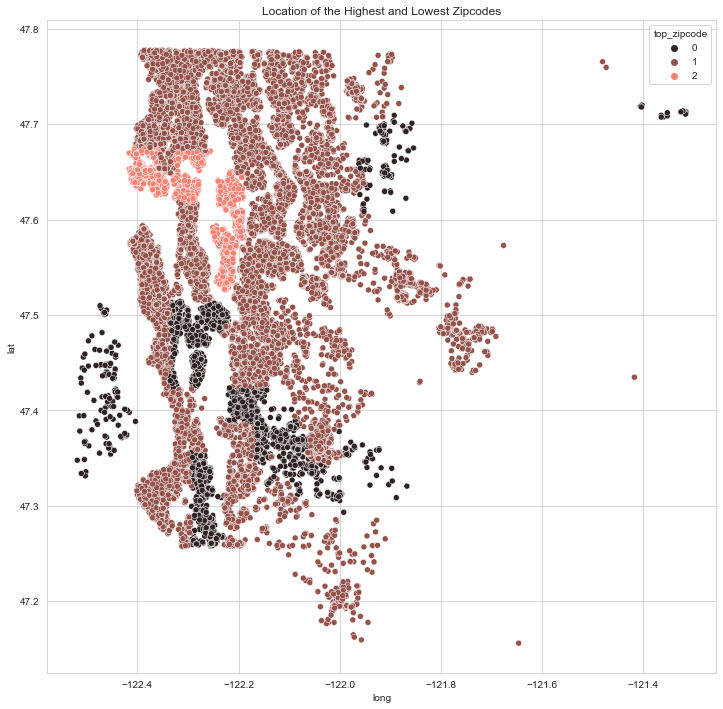

In [98]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(y = zips_df.lat, x = zips_df.long, hue=zips_df['top_zipcode'], ax=ax, palette ='dark:salmon')
ax.set_title('Location of the Highest and Lowest Zipcodes');
#save fig
fig.savefig('./images/high_low_zips.png')
fig.show()

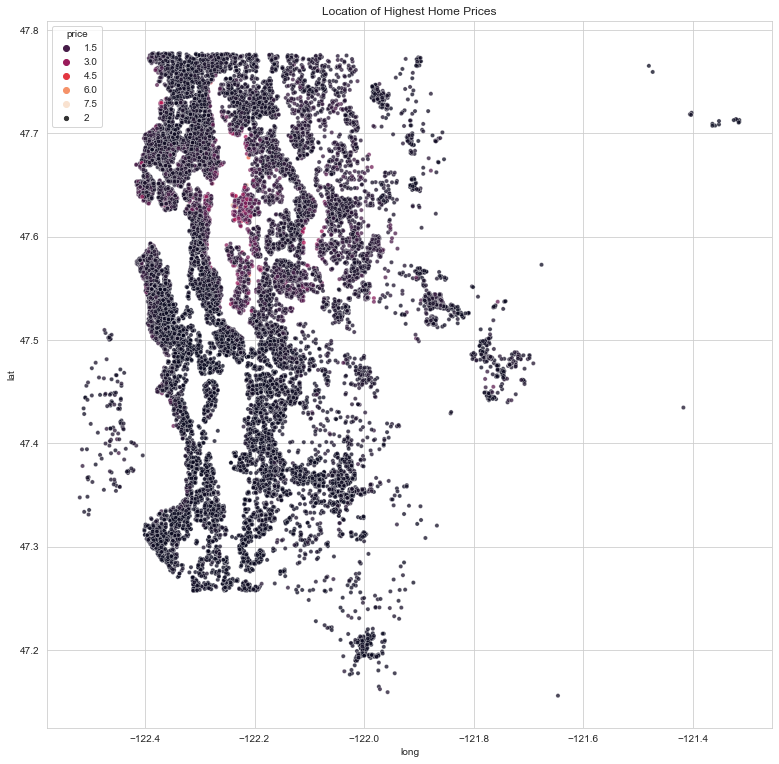

In [99]:
fig, ax = plt.subplots(figsize=(13,13))
sns.scatterplot(x=zips_df.long,y=zips_df.lat, hue=zips_df.price,palette='rocket',alpha=.75, size =2)
ax.set_title('Location of Highest Home Prices');

In [100]:
import folium
#downtown Seattle
lat = 47.6
long = -122.3

#Create a map of the area
base_map = folium.Map([lat, long], zoom_start=10)
base_map

In [101]:
#Generate top zipcode df
top_zips = zips_df[(zips_df['zipcode'] == 98039) |(zips_df['zipcode'] == 98004) |(zips_df['zipcode'] == 98109) |
                   (zips_df['zipcode'] == 98119) |(zips_df['zipcode'] == 98112) |(zips_df['zipcode'] == 98102) |
                   (zips_df['zipcode'] == 98105) |(zips_df['zipcode'] == 98040) |(zips_df['zipcode'] == 98199) |
                   (zips_df['zipcode'] == 98107)]

for i in range(0,len(top_zips)):
    folium.Marker(
    location=[top_zips.iloc[i]['lat'], top_zips.iloc[i]['long']]).add_to(base_map)
base_map

The top zipcodes are clustered around downtown Seattle.  There are also entry errors that were made inputing latitude and longitude for several of the markers made.

## Conclusions

Multiple linear regression analysis was used to build a model to predict housing prices in King County, WA. After 4 iterations from our baseline model, the results of the final regression model (Model D) indicated that 83 predictors explained 85.2% of the variance in the dataset(R2= 0.852). The RMSE of the final model was $108,603.30, which is the error in our price prediction. Difference between train and test set metrics showed that our model was not overfitted or underfitted.  All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

Following are features that have the most positive effect on sale price:

* For every 1 square foot of living space, the price is increased by 0.03%.
* Location is 2nd highest indicator of price. Our top 10 zipcodes (98039, 98004, 98112, 98109, 98119, 98102, 98105, 98040, 98199, 98107) were 142 to 281% higher in price than our baseline zipcode of 98001.

Following are features that have the most negative impact on sale price:
* Homes with a basement decreases the price by 6.11%.
* Homes with 3 floors decreases the price by 7.49%.  More floors is less desirable.

Following are some other notable conclusions:

* Price for homes with a waterfront are 64.5% higher than homes without a waterfront.
* Homes that have been renovated in the last 30 years will increase the price by 8.40%.
* Homes with a view rated as 4 (highest rating- i.e. Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, etc) increase the price by 45.59%.

Future work to improve on this model would be to make multiple models in different price ranges (i.e. 100k - 500k, 500k - 1 million, etc). Our model has limitations due to the wide range of prices in the dataset such as an error of $108,000 in predicting the price.  Another interesting extension to this project for future work is adding school districts grade into the model.